### a) Cargar la señal EMG y graficarla en el dominio del tiempo. Calcular la transformada de Fourier y graficar la magnitud de la respuesta en frecuencia de la señal, destacando el ruido a 60 Hz mediante líneas verticales.

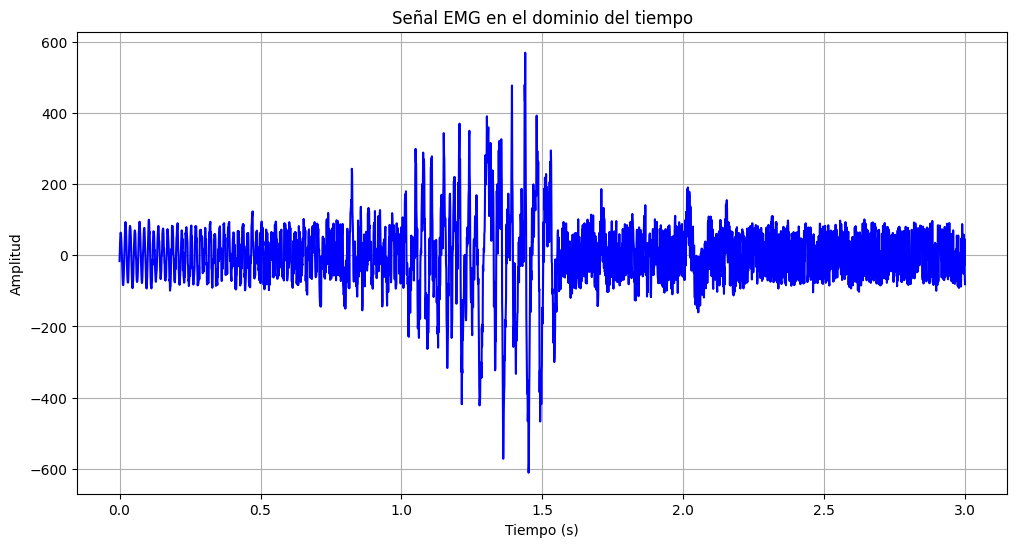

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Se carga la señal EMG
emg_signal = np.load('EMG_raw.npy')

# Parámetros
sampling_rate = 1000  # Frecuencia de muestreo en Hz
time = np.arange(len(emg_signal)) / sampling_rate  # Vector de tiempo

# Grafica de la señal EMG en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.plot(time, emg_signal, color='blue')
plt.title("Señal EMG en el dominio del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()



#### La gráfica muestra los cambios de amplitud en un registro electromiográfico cuando el músculo se encuentra en reposo y cuando se encuentra en una contracción muscular (se evidencia en las amplitudes de mayor intensidad)

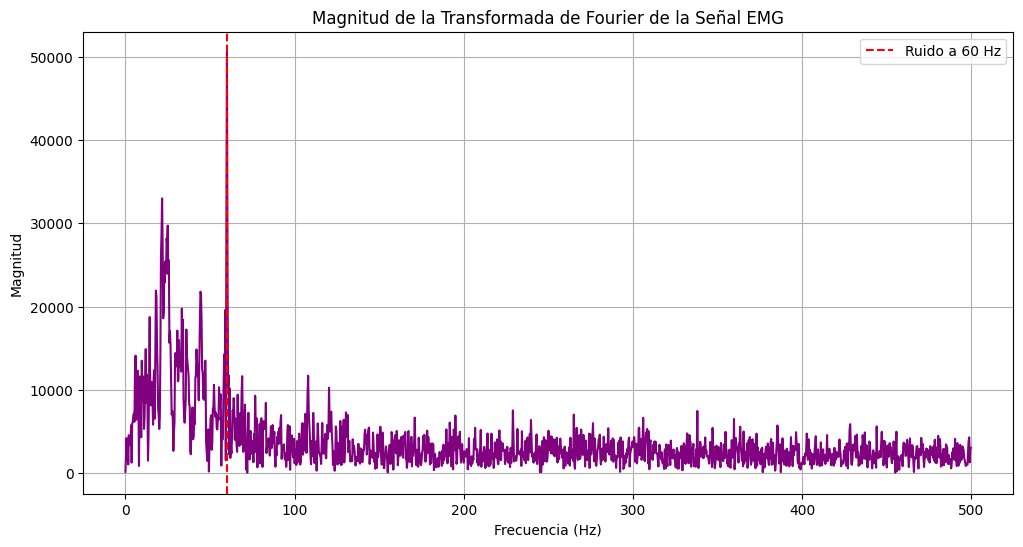

In [12]:
# Transformada de Fourier de la señal
frequencies = np.fft.fftfreq(len(emg_signal), 1 / sampling_rate)
emg_fft = np.fft.fft(emg_signal)
magnitude_spectrum = np.abs(emg_fft)

# Grafica de la magnitud de la respuesta en frecuencia
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], magnitude_spectrum[:len(frequencies)//2], color='purple')
plt.axvline(x=60, color='red', linestyle='--', label='Ruido a 60 Hz')
plt.title("Magnitud de la Transformada de Fourier de la Señal EMG")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.show()


#### La componente de ruido es notoria en la frecuencia 60 Hz, esto se muestra en la lina vertical punteada de rojo. 

### b) Diseñar un filtro FIR utilizando el método de ventanas con una ventana de Hamming, con frecuencia de corte de 50 Hz y 33 coeficientes. Graficar la respuesta impulsiva, su magnitud y fase de la respuesta en frecuencia para ambas ventanas, comparándolas con la respuesta ideal

C:\Users\HP\AppData\Local\Temp\ipykernel_17128\3891073441.py:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(fir_coefficients, basefmt=" ", use_line_collection=True)


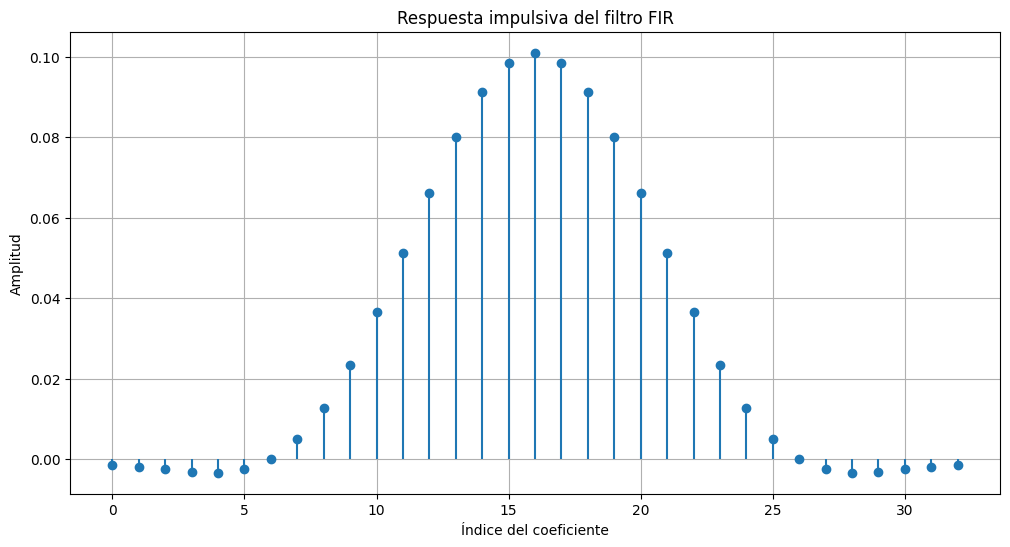

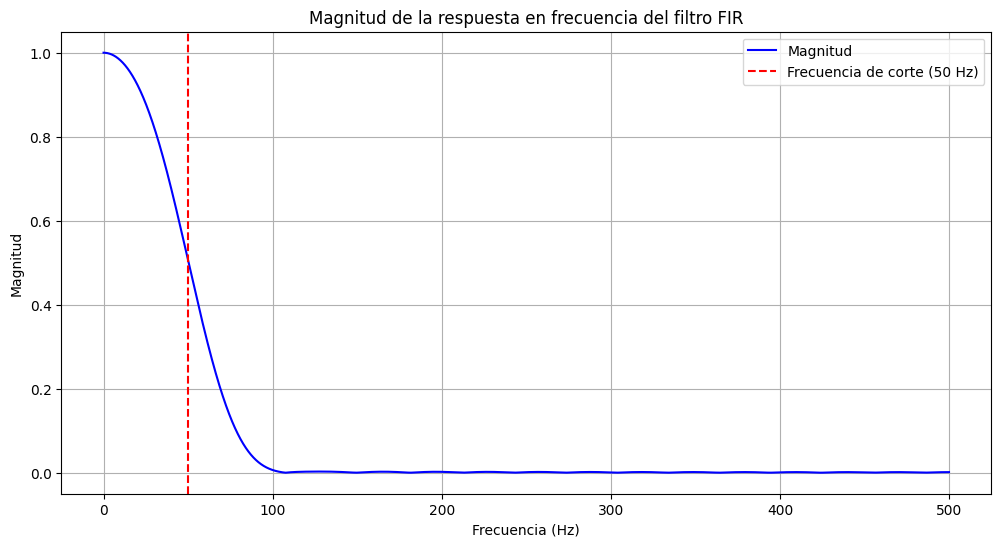

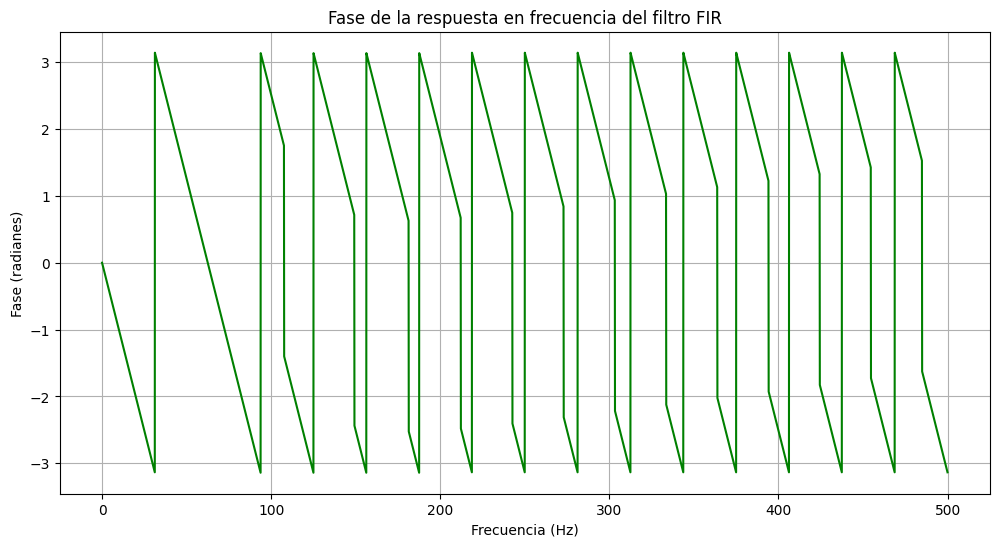

In [17]:
from scipy.signal import firwin, freqz

# Diseño del filtro FIR con ventana de Hamming
num_taps = 33 # Número de coeficientes
cutoff_frequency = 50  # Frecuencia de corte en Hz
fir_coefficients = firwin(num_taps, cutoff=cutoff_frequency, fs=sampling_rate, window="hamming")

# Respuesta en frecuencia del filtro
w, h = freqz(fir_coefficients, worN=8000, fs=sampling_rate)

# Grafica de la respuesta impulsiva del filtro
plt.figure(figsize=(12, 6))
plt.stem(fir_coefficients, basefmt=" ", use_line_collection=True)
plt.title("Respuesta impulsiva del filtro FIR")
plt.xlabel("Índice del coeficiente")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Grafica de la magnitud y fase de la respuesta en frecuencia del filtro
plt.figure(figsize=(12, 6))
plt.plot(w, np.abs(h), color='blue', label="Magnitud")
plt.axvline(x=cutoff_frequency, color='red', linestyle='--', label='Frecuencia de corte (50 Hz)')
plt.title("Magnitud de la respuesta en frecuencia del filtro FIR")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(w, np.angle(h), color='green')
plt.title("Fase de la respuesta en frecuencia del filtro FIR")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.grid(True)
plt.show()


#### Notamos que la respuesta impulsiva del filtro FIR no se asemeja del todo a su respuesta ideal en frecuencia. Esto se debe a la cantidad de coeficientes del filtro, pues si se considerara más coeficientes el parecido entre el filtro FIR y el ideal sería más notorio. Esto lo podeoms ver si probamos una cantidad de coeficientes de 1000 por ejemplo:

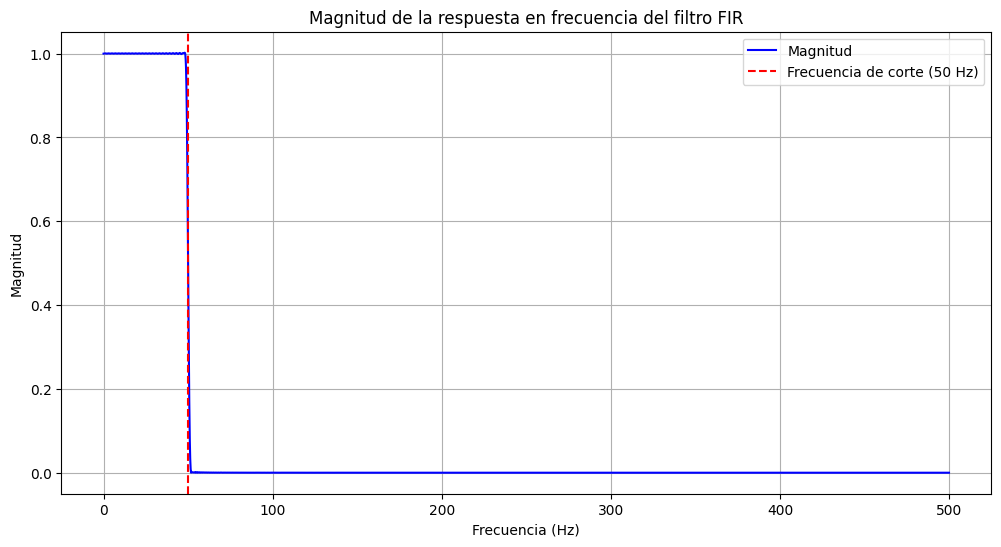

In [18]:
num_taps = 1000 # Número de coeficientes
cutoff_frequency = 50  # Frecuencia de corte en Hz
fir_coefficients = firwin(num_taps, cutoff=cutoff_frequency, fs=sampling_rate, window="hamming")

# Respuesta en frecuencia del filtro
w, h = freqz(fir_coefficients, worN=8000, fs=sampling_rate)

# Grafica de la magnitud y fase de la respuesta en frecuencia del filtro
plt.figure(figsize=(12, 6))
plt.plot(w, np.abs(h), color='blue', label="Magnitud")
plt.axvline(x=cutoff_frequency, color='red', linestyle='--', label='Frecuencia de corte (50 Hz)')
plt.title("Magnitud de la respuesta en frecuencia del filtro FIR")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.show()